In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from astropy.io import fits
from astropy import modeling
import scipy.integrate as integrate
from tqdm import tqdm

In [2]:
data=pd.read_csv('/media/richard/Backup Plus/314kpair_DR16_final_Z_0.4_v11.5_star_fo_in_pair.csv',low_memory=False)

In [3]:
data=data[(data.SN_6020_15==True) & (data.CL_1_COUNTS_2==True)]

In [5]:
f=open('/media/richard/Backup Plus/firefly_release/error_not_fit.txt','w')
#data=data[6953:]
for i in tqdm(data.index):
    if os.path.exists("/media/richard/Backup Plus/firefly_release/run/output/spFly-%s"%data.specname[i])==True:
        fitting=fits.open("/media/richard/Backup Plus/firefly_release/run/output/spFly-%s"%data.specname[i])
        head=fitting[1].header
        data.loc[data.index==i,'black_mass_best']=float(head['HIERARCH remnant_mass_blackholes'])
        data.loc[data.index==i,'stellar_mass_best']=float(head['HIERARCH stellar_mass'])
        data.loc[data.index==i,'total_mass_best']=float(head['HIERARCH total_mass'])
        data.loc[data.index==i,'SFR_0']=float(head['HIERARCH SFR_ssp_0'])
        try:
            data.loc[data.index==i,'SFR_1']=float(head['HIERARCH SFR_ssp_1'])
        except KeyError:
            data.loc[data.index==i,'SFR_1']=-999
        data.loc[data.index==i,'color_BV']=float(head['HIERARCH EBV'])
        data.loc[data.index==i,'age_lightw']=float(head['HIERARCH age_lightW']) 
        data.loc[data.index==i,'age_massw']=float(head['HIERARCH age_massW'])
    else:
        print('no such file:%s'%data.specname[i])
        f.write('%s \n'%data.specname[i])
        data.loc[data.index==i,'black_mass_best']=-999
        data.loc[data.index==i,'stellar_mass_best']=-999
        data.loc[data.index==i,'total_mass_best']=-999
        data.loc[data.index==i,'SFR_0']=-999
        data.loc[data.index==i,'SFR_1']=-999
        data.loc[data.index==i,'color_BV']=-999
        data.loc[data.index==i,'age_lightw']=-999
        data.loc[data.index==i,'age_massw']=-999
f.close()

 87%|████████▋ | 2245/2577 [05:43<00:21, 15.12it/s]

no such file:spec-1379-53063-0124.fits
no such file:spec-1379-53063-0233.fits
no such file:spec-1379-53063-0331.fits
no such file:spec-1379-53063-0348.fits
no such file:spec-1379-53063-0441.fits
no such file:spec-1379-53063-0447.fits
no such file:spec-1379-53063-0630.fits


100%|██████████| 2577/2577 [06:30<00:00,  6.60it/s]


In [4]:
len(data)

2577

In [7]:
data.to_csv('/media/richard/Backup Plus/314kpair_DR16_final_Z_0.4_v11.5_star_fo_in_pair2577.csv')

Text(0.5, 1.0, ' BH Mass for Best fit')

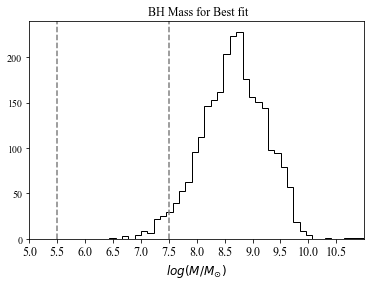

In [32]:
bl_mass=data.black_mass_best
bl_mass=bl_mass.astype(float)

mpl.rcParams['agg.path.chunksize']=1000
mpl.rcParams['font.serif']='Times New Roman'
mpl.rc('font',family='Times New Roman')
ax=plt.subplot(1,1,1)
civ=ax.hist(x=bl_mass,bins='auto',color='black',alpha=1,rwidth=1,linewidth=1,histtype='step')
ax.set_xlabel(r'$log(M/M_{\odot})$',fontsize=12)
ax.set_xlim(5,11)
#ax.set_ylim(0,100)
ax.set_xticks(np.arange(5,11,0.5))
plt.xticks(fontsize=12)
'''ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)'''
#ax.set_yticks(np.arange(0,10000,1000))
ax.axvline(x=5.5,ls='--',color='gray')
ax.axvline(x=7.5,ls='--',color='gray')
plt.title(r' BH Mass for Best fit')

In [43]:
g=data.loc[(data.black_mass_best<8)&(data.black_mass_best>5),'GroupID']
for i in g:print (i)

117
1464
1604
2092
2271
2271
2326
2458
2458
2538
2743
3595
3656
3908
5360
6060
6060
7111
7635
7635
8742
8742
9235
9235
9489
9633
9961
10173
10556
11400
11400
11581
11687
11687
11839
12012
12348
12391
13883
13883
14872
14872
15596
15721
15721
15721
16054
16704
16999
17014
17543
17781
17803
18119
18899
18998
19165
19409
19459
19887
20492
20509
21383
22313
22458
22487
22487
22722
22863
22925
23032
23697
23697
24042
24042
24042
24042
24141
24188
24188
24188
24188
24527
24527
24556
24595
24631
24631
24649
24651
25325
25341
26418
28517
28768
28938
29696
29781
30873
31006
31093
31503
31842
33361
33465
33502
33955
35982
36706
36772
36772
36772
37025
37033
37033
37494
37903
38538
39283
39435
39709
39717
39793
40183
40317
40317
40593
40623
40682
40698
40698
40837
40837
41095
41131
42617
42839
43039
43063
43394
44830
44830
45952
45952
45952
49102
49119
49601
51496
54301
54341
54604
54604
54668
54794
55675
56076
56076
56143
56478
56569
56622
56642
56707
56707
56875
56907
56946
56998
57000
57000
57